In [203]:
import numpy as np
import torch
import torchvision
from torchvision import transforms as T
import pandas as pd
from PIL import Image
import os
from glob import glob

In [204]:
df = pd.read_csv("C:\\Users\Vitaliy\\3D Objects\\detect\\camera1.csv")

In [205]:
df.head()

,SlotId,X,Y,W,H
0,603,1034,1640,240,240
1,604,718,1320,240,240
2,605,504,1126,200,200
3,606,306,944,180,180
4,607,169,811,150,150


масштабируем боксы

In [206]:
x_old = 2592
y_old = 1944
x_new = 1000
y_new = 750

In [207]:
x_scale = x_old/x_new
y_scale = y_old/y_new
print(f'x = {x_scale}, y = {y_scale}')

x = 2.592, y = 2.592


In [208]:
def change_scale(x, x_scale):
  return int(x // x_scale)

In [209]:
data = pd.DataFrame()
data['X'] = df.X.apply(lambda x: change_scale(x, x_scale))
data['Y'] = df.Y.apply(lambda x: change_scale(x, x_scale))
data['W'] = df.W
data['H'] = df.H
data['SlotId'] = df.SlotId

In [210]:
data.shape

(35, 5)

In [211]:
data.head()

,X,Y,W,H,SlotId
0,398,632,240,240,603
1,277,509,240,240,604
2,194,434,200,200,605
3,118,364,180,180,606
4,65,312,150,150,607


извлечем все имена картинок для разных камер

In [212]:
camera = []
for i in range(9):
    camera.append(f'camera{i+1}')
camera

['camera1',
 'camera2',
 'camera3',
 'camera4',
 'camera5',
 'camera6',
 'camera7',
 'camera8',
 'camera9']

In [213]:
O = glob("C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\OVERCAST\\*\\", recursive=True)
S = glob("C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\*\\", recursive=True)
R = glob("C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\RAINY\\*\\", recursive=True)

In [214]:
S

['C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2015-11-12\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2015-11-22\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2015-11-27\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2015-12-10\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2015-12-17\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2016-01-12\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2016-01-13\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2016-01-15\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2016-01-16\\',
 'C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\SUNNY\\2016-01-18\\']

In [215]:
S[0][len(S[0])-11:len(S[0])-1]

'2015-11-12'

Теперь из папок sunny, rainy, overcast извлечем названия нужных папок

In [216]:
a = [O, S, R]
for folder in a:
    for i, elem in enumerate(folder):
        folder[i] = elem[len(elem)-11:len(elem)-1]

In [217]:
S

['2015-11-12',
 '2015-11-22',
 '2015-11-27',
 '2015-12-10',
 '2015-12-17',
 '2016-01-12',
 '2016-01-13',
 '2016-01-15',
 '2016-01-16',
 '2016-01-18']

в переменной camera_i будем хранить массив из 9 элементов, в каждом из которых будут храниться имена картинок для каждой из камер

In [218]:
camera_i = [[], [], [], [], [], [], [], [], []]
camera_i

[[], [], [], [], [], [], [], [], []]

In [219]:
for dir in a:
    for folder in dir:
        for cam in camera:
            if dir==S:
                direct = 'SUNNY'
            elif dir==O:
                direct = 'OVERCAST'
            elif dir==R:
                direct = 'RAINY'
            elems = os.listdir(f"C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\{direct}\\{folder}\\{cam}")
            for elem in elems:
                camera_i[int(cam[-1])-1].append(elem)

проверим как извлекается бокс

In [220]:
data.SlotId.count()

35

In [221]:
for elem in camera_i[0]:
    if elem[len(elem)-7:len(elem)-4] == '603':
        print(elem)
        break

O_2015-11-16_07.10_C01_603.jpg


In [317]:
pic = Image.open("C:\\Users\\Vitaliy\\3D Objects\\detect\\PATCHES\\OVERCAST\\2015-11-16\\camera1\\O_2015-11-16_07.10_C01_603.jpg")

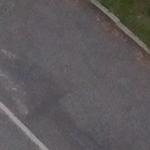

In [318]:
pic

загрузим общий датасет и проверим правильность масштабирования координатов

In [224]:
df = pd.read_csv("C:\\Users\\Vitaliy\\3D Objects\\detect\\CNRPark+EXT.csv")
df.head()

c:\Users\Vitaliy\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
0,A,20150703_0805,3,8,CNRPark/A/free/20150703_0805_1.jpg,5,7,0,1,S,2015,NaN
1,A,20150703_0810,3,8,CNRPark/A/free/20150703_0810_1.jpg,10,7,0,1,S,2015,NaN
2,A,20150703_0815,3,8,CNRPark/A/busy/20150703_0815_1.jpg,15,7,1,1,S,2015,0.0
3,A,20150703_0820,3,8,CNRPark/A/busy/20150703_0820_1.jpg,20,7,1,1,S,2015,0.0
4,A,20150703_0825,3,8,CNRPark/A/busy/20150703_0825_1.jpg,25,7,1,1,S,2015,0.0


Проверим сколько разных папок содержат данные

In [225]:
mas = []

def check(x):
  global mas
  if x[:5] in mas:
    return x
  else:
    mas.append(x[:5])
    return x

In [226]:
df['image_url'].apply(lambda x: check(x))

0                        CNRPark/A/free/20150703_0805_1.jpg
1                        CNRPark/A/free/20150703_0810_1.jpg
2                        CNRPark/A/busy/20150703_0815_1.jpg
3                        CNRPark/A/busy/20150703_0820_1.jpg
4                        CNRPark/A/busy/20150703_0825_1.jpg
                                ...                        
157544    CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...
157545    CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...
157546    CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...
157547    CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...
157548    CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...
Name: image_url, Length: 157549, dtype: object

Всего 2, нам нужна вторая

In [227]:
mas

['CNRPa', 'CNR-E']

в датасете есть ненужные данные - это все сэмплы с камерами  A, B. Уберем их

In [228]:
df.camera.unique()

array(['A', 'B', '01', '02', '03', '04', '05', '06', '07', '08', '09', 5,
       6, 7, 8, 9, 3, 4, 1, 2], dtype=object)

In [229]:
df = df[(df.camera != 'A') & (df.camera != 'B')]
df.head()

,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
12584,01,2015-11-12_07.09,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,9,11,0,184,S,2015,NaN
12585,02,2015-11-12_07.14,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera2/S_201...,14,11,0,184,S,2015,NaN
12586,01,2015-11-12_07.39,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,39,11,0,184,S,2015,NaN
12587,02,2015-11-12_07.44,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera2/S_201...,44,11,0,184,S,2015,NaN
12588,01,2015-11-12_08.09,12,8,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,9,11,0,184,S,2015,NaN


In [230]:
df.shape

(144965, 12)

In [231]:
def change_name(x):
    return x[8:]

df['image_url'] = df['image_url'].apply(lambda x: change_name(x))
df.head()

,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
12584,01,2015-11-12_07.09,12,7,PATCHES/SUNNY/2015-11-12/camera1/S_2015-11-12_...,9,11,0,184,S,2015,NaN
12585,02,2015-11-12_07.14,12,7,PATCHES/SUNNY/2015-11-12/camera2/S_2015-11-12_...,14,11,0,184,S,2015,NaN
12586,01,2015-11-12_07.39,12,7,PATCHES/SUNNY/2015-11-12/camera1/S_2015-11-12_...,39,11,0,184,S,2015,NaN
12587,02,2015-11-12_07.44,12,7,PATCHES/SUNNY/2015-11-12/camera2/S_2015-11-12_...,44,11,0,184,S,2015,NaN
12588,01,2015-11-12_08.09,12,8,PATCHES/SUNNY/2015-11-12/camera1/S_2015-11-12_...,9,11,0,184,S,2015,NaN


приведем все камеры к одному типу, т.е. '01' станет 1

In [232]:
def change_camera(x):
    return int(x)

df['camera'] = df['camera'].apply(lambda x: change_camera(x))

найдем один из кусочков

In [233]:
df[(df.camera == 1) & (df.image_url == 'PATCHES/OVERCAST/2015-11-16/camera1/O_2015-11-16_07.10_C01_603.jpg')]

,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
24825,1,2015-11-16_07.10,16,7,PATCHES/OVERCAST/2015-11-16/camera1/O_2015-11-...,10,11,0,603,O,2015,NaN


так как в папке FULL_IMAGE_1000x750 имена картинок записаны по-другому, то необходимо преобразовать исходные имена данного датасета, для этого создадим второй датафрейм с преобразованными именами

In [234]:
df2 = pd.DataFrame()

def preprocessing(x):
  t = 0
  cnt = 0
  ans = ''
  for symb in x:
    if symb == '/':
      t += 1
    if t == 4:
      ans = ans + x[cnt+3:]
      break
    cnt += 1

  ans = ans[:13] + ans[14:16]
  return ans + '.jpg'

In [235]:
a = preprocessing('PATCHES/OVERCAST/2015-11-16/camera1/O_2015-11-16_07.10_C01_603.jpg')
a

'2015-11-16_0710.jpg'

In [236]:
pic = Image.open("C:\\Users\Vitaliy\\3D Objects\\detect\\FULL_IMAGE_1000x750\\OVERCAST\\2015-11-16\\camera1\\2015-11-16_0710.jpg")

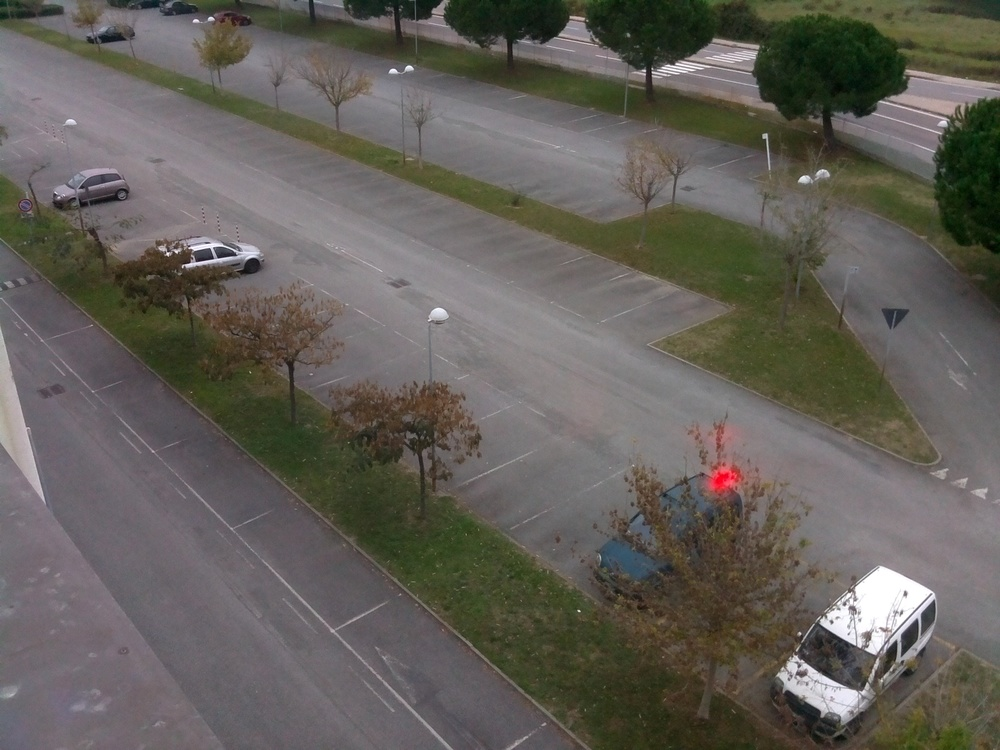

In [237]:
pic

обернем фото в тензор и вырежим нужные координаты

In [238]:
transforms = T.ToTensor()
img = transforms(pic)

In [239]:
img.shape

torch.Size([3, 750, 1000])

In [ ]:
data[data.SlotId == 603]

,X,Y,W,H,SlotId
0,398,632,240,240,603


In [337]:
x = 398
y = 632
w = 240
h = 240

In [358]:
img_small = torch.zeros((3, w, h))
idx = 0
idy = 0
for k in range(img.shape[0]):
    for i in range(img.shape[1]):
        for j in range(img.shape[2]):
            if (i >= x and i < (x+w)) and (j >= y and j < (y+h)):
                img_small[k, idy, idx] = img[k, i, j]
                idx += 1
                if idx == w:
                    idx = 0
                    idy += 1
                if idy == h:
                    idy = 0
            

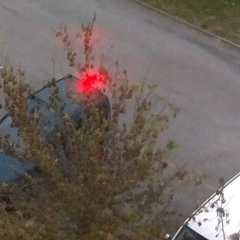

In [359]:
to_img = T.ToPILImage()
img_pic = to_img(img_small)
img_pic

In [277]:
img_small[0]

tensor([[0.5373, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5216, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5098,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.3686, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3490, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3059]])

In [331]:
data[data.SlotId == 604]

,X,Y,W,H,SlotId
1,277,509,240,240,604
